# Naive Bayes Classifier

In [1]:
# read prepped data using pandas
import pandas as pd

df = pd.read_csv("source_output/churn_prepped1.csv", header='infer', index_col=0)
df.head(5)

,Port_modem,Tablet,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,...,Age_age_1,Age_age_2,Age_age_3,Age_age_4,Children_children_1,Children_children_2,Children_children_3,Contract_Month-to-month,Contract_One year,Contract_Two Year
0,1,1,1,0,1,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
1,0,1,1,1,1,0,0,0,1,1,...,1,0,0,0,1,0,0,1,0,0
2,1,0,1,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,1
3,0,0,1,0,1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
4,1,0,0,0,0,0,0,1,1,0,...,0,0,0,1,0,0,0,1,0,0


In [2]:
# partition data
from sklearn.model_selection import train_test_split

X = df.drop(columns='Churn')
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Output

In [3]:
X_train.to_csv("source_output/train_data1.csv")
X_test.to_csv("source_output/test_data1.csv")

## Model

In [4]:
# assign variables and fit model
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB(alpha=0.01, fit_prior=True)
clf.fit(X_train, y_train)

MultinomialNB(alpha=0.01)

## Evaluation

### Accuracy

In [25]:
# get accuracy score
from sklearn.metrics import (accuracy_score, roc_curve, auc)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
accuracy

0.8748

### ROC Curve

Text(0, 0.5, 'recall')

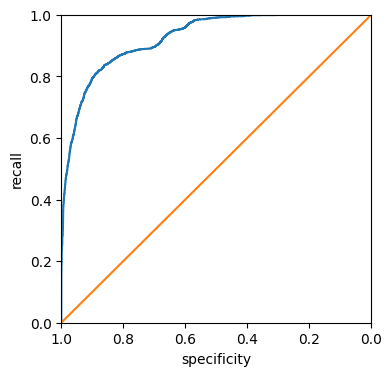

In [26]:
# plot ROC curve
fpr, tpr, thresholds = roc_curve(y, clf.predict_proba(X)[:,1], pos_label=1)
roc_df = pd.DataFrame({'recall':tpr, 'specificity':1-fpr})
     
ax = roc_df.plot(x='specificity', y='recall', figsize=(4,4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')

### AUC

In [28]:
# calculate auc
auc(fpr, tpr)

0.9255728917982287